<a href="https://colab.research.google.com/github/sainisatish/DeepLearningFromScratch/blob/main/Cat_And_Dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import files

In [ ]:
files.upload()

In [23]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:04<00:00, 209MB/s]
100% 812M/812M [00:04<00:00, 205MB/s]


In [25]:
!unzip -qq dogs-vs-cats.zip

In [26]:
!unzip -qq train.zip

In [27]:
import os,shutil,pathlib

In [28]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [29]:
def make_subset(subset_name, start_index, end_index): 
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" 
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [30]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500) 
make_subset("test", start_index=1500, end_index=2500)

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x=layers.Rescaling(1./255)(inputs)
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x=layers.Flatten()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs,outputs=outputs)



In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

In [41]:
from tensorflow.keras.utils import image_dataset_from_directory 

In [42]:
train_dataset=image_dataset_from_directory(new_base_dir/"train",
                                           image_size=(180,180),
                                           batch_size=32)

validation_dataset = image_dataset_from_directory(new_base_dir /"validation",
                                                  image_size=(180,180),
                                                  batch_size=32)

test_size = image_dataset_from_directory(new_base_dir /"test",
                                         image_size=(180,180),
                                         batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
for data_batch,label_batch in train_dataset:
    print(f"data batch shape {data_batch.shape}")
    print(f"label batch shape { label_batch.shape}")
    break

data batch shape (32, 180, 180, 3)
label batch shape (32,)


In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras",save_best_only=True,monitor="val_loss")]

In [ ]:
history = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 15s 73ms/step - loss: 0.6978 - accuracy: 0.5120 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6937 - accuracy: 0.5370 - val_loss: 0.6956 - val_accuracy: 0.5070
Epoch 3/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6744 - accuracy: 0.6025 - val_loss: 0.6554 - val_accuracy: 0.6310
Epoch 4/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6519 - accuracy: 0.6435 - val_loss: 0.6247 - val_accuracy: 0.6510
Epoch 5/30
63/63 [==============================] - 6s 85ms/step - loss: 0.6288 - accuracy: 0.6535 - val_loss: 0.6228 - val_accuracy: 0.6460
Epoch 6/30
63/63 [==============================] - 4s 63ms/step - loss: 0.5947 - accuracy: 0.6805 - val_loss: 0.5969 - val_accuracy: 0.6820
Epoch 7/30
63/63 [==============================] - 5s 79ms/step - loss: 0.5757 - accuracy: 0.6945 - val_loss: 0.6570 - val_accuracy: 0.6540
Epoch 8/30
6

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
accuracy,val_accuracy,loss,val_loss = history.history["accuracy"],history.history["val_accuracy"],history.history["loss"],history.history["val_loss"]

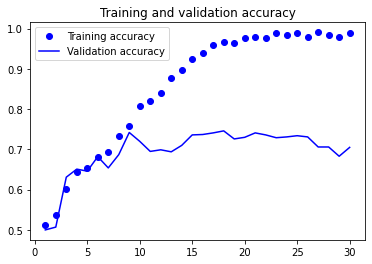

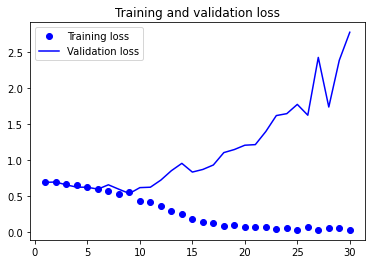

In [ ]:
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc = model.evaluate(test_size)

63/63 [==============================] - 4s 43ms/step - loss: 2.9484 - accuracy: 0.6895


Performing Data Augmentation 

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
    )

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x= data_augmentation(inputs)
x= layers.Rescaling(1./255)(x)
x= layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x= layers.Flatten()(x)
outputs= layers.Dense(1,activation='sigmoid')(x)
model_aug = keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model_aug.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
 callbacks = [(keras.callbacks.ModelCheckpoint(filepath="augment_model.keras",save_best_only=True,monitor="val_loss"))]

In [ ]:
history = model_aug.fit(train_dataset,epochs=100,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/100


63/63 [==============================] - 27s 234ms/step - loss: 0.6970 - accuracy: 0.4970 - val_loss: 0.6923 - val_accuracy: 0.5020
Epoch 2/100
63/63 [==============================] - 13s 205ms/step - loss: 0.6927 - accuracy: 0.5195 - val_loss: 0.6867 - val_accuracy: 0.5880
Epoch 3/100
63/63 [==============================] - 14s 215ms/step - loss: 0.6850 - accuracy: 0.5715 - val_loss: 0.6612 - val_accuracy: 0.5990
Epoch 4/100
63/63 [==============================] - 13s 204ms/step - loss: 0.6635 - accuracy: 0.6215 - val_loss: 0.6706 - val_accuracy: 0.6270
Epoch 5/100
63/63 [==============================] - 15s 229ms/step - loss: 0.6219 - accuracy: 0.6595 - val_loss: 0.6228 - val_accuracy: 0.6570
Epoch 6/100
63/63 [==============================] - 13s 208ms/step - loss: 0.6108 - accuracy: 0.6830 - val_loss: 0.6341 - val_accuracy: 0.6430
Epoch 7/100
63/63 [==============================] - 13s 207ms/step - loss: 0.5915 - accuracy: 0.6800 - val_loss: 0.6330 - val_accuracy: 0.6750
Epoc

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt

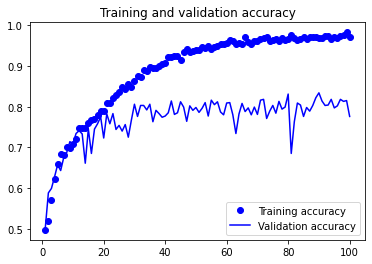

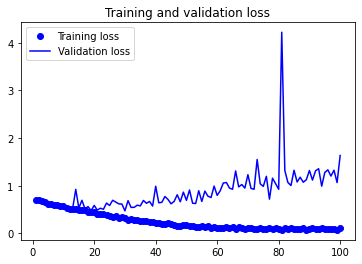

In [ ]:
accuracy,val_accuracy,loss,val_loss = history.history["accuracy"],history.history["val_accuracy"],history.history["loss"],history.history["val_loss"]
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "augment_model.keras")
test_loss, test_acc = test_model.evaluate(test_size)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 50ms/step - loss: 0.5484 - accuracy: 0.7660
Test accuracy: 0.766


Now using pretrained model to increase accuracy - VGG16


In [ ]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,input_shape=(180,180,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
import numpy as np

first Method to clasify images( Cat vs Dog)

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [ ]:
train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_size) 

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)        
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")]

In [ ]:
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 11ms/step - loss: 20.3978 - accuracy: 0.9190 - val_loss: 6.2690 - val_accuracy: 0.9480
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 2.4782 - accuracy: 0.9765 - val_loss: 4.3505 - val_accuracy: 0.9780
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6212 - accuracy: 0.9880 - val_loss: 5.1702 - val_accuracy: 0.9700
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0563 - accuracy: 0.9890 - val_loss: 4.9310 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.8361 - accuracy: 0.9920 - val_loss: 6.0496 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.5249 - accuracy: 0.9935 - val_loss: 4.4637 - val_accuracy: 0.9660
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.4439 - accuracy: 0.9950 - val_loss: 4.1633 - val_accuracy: 0.9780
Epoch 8/20
63/63 [

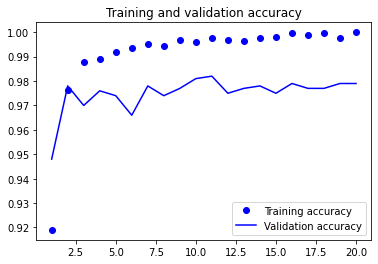

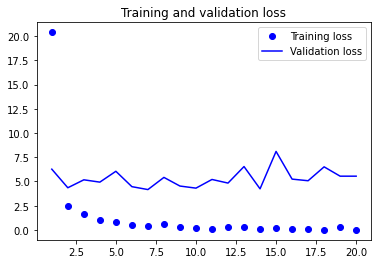

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

2nd Method to use pretrained model 

In [32]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,input_shape=(180,180,3))

In [33]:
conv_base.trainable = False

In [34]:
data_augmentation = keras.Sequential([
                                        layers.RandomFlip("horizontal"),
                                        layers.RandomRotation(0.1),
                                        layers.RandomZoom(0.2)
]) 

In [35]:
inputs = keras.Input(shape=(180,180,3))
x  = data_augmentation(inputs)
x  = keras.applications.vgg16.preprocess_input(x)
x  = conv_base(x)
x  = layers.Flatten()(x)
x  = layers.Dense(256,activation='relu')(x)
x  = layers.Dropout(0.5)(x)
outputs  = layers.Dense(1,activation="sigmoid")(x)
model = keras.Model(inputs=inputs,outputs=outputs)

In [36]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_3   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_3 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0   

In [44]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [38]:
callbacks = [keras.callbacks.ModelCheckpoint(save_best_only=True,filepath = "keras_vgg16_aug.keras",monitor="val_loss")]

In [45]:
history = model.fit(train_dataset,epochs=50,validation_data= validation_dataset,callbacks=callbacks)

Epoch 1/50


63/63 [==============================] - 36s 332ms/step - loss: 7.7353 - accuracy: 0.8835 - val_loss: 0.8204 - val_accuracy: 0.9710
Epoch 2/50
63/63 [==============================] - 18s 285ms/step - loss: 1.0802 - accuracy: 0.9475 - val_loss: 0.7355 - val_accuracy: 0.9680
Epoch 3/50
63/63 [==============================] - 19s 293ms/step - loss: 0.8021 - accuracy: 0.9560 - val_loss: 0.7193 - val_accuracy: 0.9630
Epoch 4/50
63/63 [==============================] - 18s 280ms/step - loss: 0.4949 - accuracy: 0.9630 - val_loss: 0.5699 - val_accuracy: 0.9730
Epoch 5/50
63/63 [==============================] - 18s 277ms/step - loss: 0.3984 - accuracy: 0.9665 - val_loss: 0.5900 - val_accuracy: 0.9660
Epoch 6/50
63/63 [==============================] - 18s 279ms/step - loss: 0.2913 - accuracy: 0.9695 - val_loss: 0.4935 - val_accuracy: 0.9700
Epoch 7/50
63/63 [==============================] - 20s 313ms/step - loss: 0.2633 - accuracy: 0.9720 - val_loss: 0.2434 - val_accuracy: 0.9750
Epoch 8/50